In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DST VALUES

In [34]:
#headers = ['INDEX', 'YM * D', 'X + VERSION + YEAR'] + ['BASE VALUE','','','']  + ['1','','2','','3','','4','','5','','6','','7','','8','','9','','10','','11','','12','','13','','14','','15','','16','','17','','18','','19','','20','','21','','22','','23','','24'] + ['DAILY MEAN VALUE','','','' ]
headers = ['INDEX', 'YYMM * DD', 'X + VERSION + YEAR'] + ['BASE VALUE']  + ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'] + ['DAILY MEAN VALUE']

""" 
    Version number (0: quicklook, 1: provisional, 2: final, 3+: corrected final)
    Columns 17-20: Base value, unit 100 nT
    Columns 21-116: 24 hourly values, 4 digits each, unit 1 nT (value 9999 for missing data)
    Columns 117-120: Daily mean value, unit 1 nT (value 9999 for missing data)
"""


dst = pd.read_csv('./Data/DST values(2014Jan - 2024Jan).txt', delim_whitespace=True, header=None)
dst.columns = headers
dst.head()


,INDEX,YYMM * DD,X + VERSION + YEAR,BASE VALUE,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,DAILY MEAN VALUE
0,AU,1401*01,X120,000,010,011,021,040,077,103,...,254,092,055,037,050,086,095,060,57.0,84.0
1,AU,1401*02,X120,000,057,079,102,109,174,123,...,086,064,060,112,058,024,021,035,56.0,73.0
2,AU,1401*03,X120,000,053,053,045,035,034,048,...,007,043,084,070,044,048,035,025,20.0,47.0
3,AU,1401*04,X120,000,021,015,011,014,020,021,...,020,017,011,016,009,016,038,023,15.0,23.0
4,AU,1401*05,X120,000,015,024,014,019,023,030,...,025,017,008,004,006,004,004,008,4.0,16.0


In [55]:
dst['YY'] = dst['YYMM * DD'].str[:2]
dst['MM'] = dst['YYMM * DD'].str[2:4]
dst['DD'] = dst['YYMM * DD'].str[-2:]
dst.head()
#dst.to_csv('./Data/DST.csv')

,INDEX,YYMM * DD,X + VERSION + YEAR,BASE VALUE,1,2,3,4,5,6,...,19,20,21,22,23,24,DAILY MEAN VALUE,YY,MM,DD
0,AU,1401*01,X120,000,010,011,021,040,077,103,...,037,050,086,095,060,57.0,84.0,14,01,01
1,AU,1401*02,X120,000,057,079,102,109,174,123,...,112,058,024,021,035,56.0,73.0,14,01,02
2,AU,1401*03,X120,000,053,053,045,035,034,048,...,070,044,048,035,025,20.0,47.0,14,01,03
3,AU,1401*04,X120,000,021,015,011,014,020,021,...,016,009,016,038,023,15.0,23.0,14,01,04
4,AU,1401*05,X120,000,015,024,014,019,023,030,...,004,006,004,004,008,4.0,16.0,14,01,05


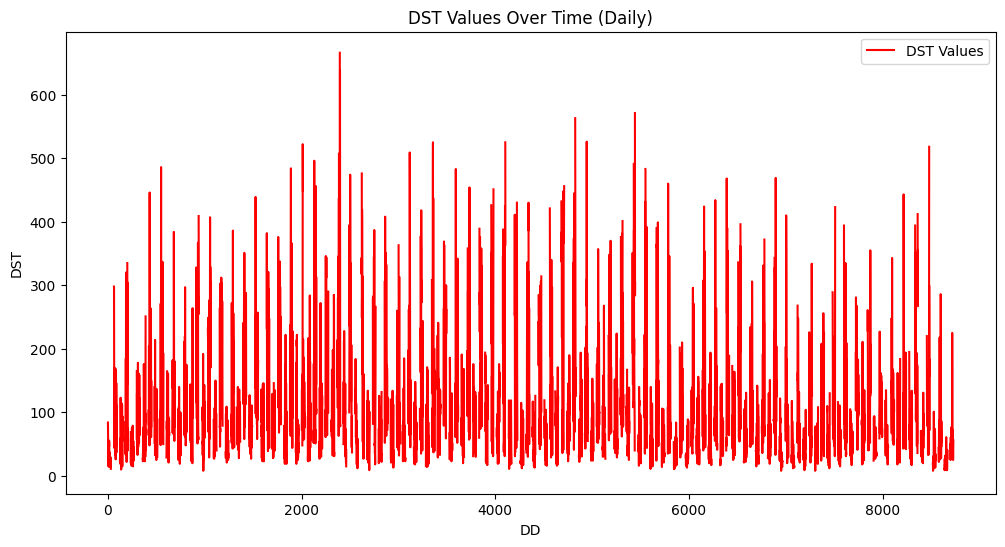

In [40]:
plt.figure(figsize=(12, 6))
x = dst['YYMM * DD']
y = dst['DAILY MEAN VALUE']
plt.plot(dst.index, y, label='DST Values', color = 'red')
plt.title('DST Values Over Time (Daily)', color = 'black')
plt.xlabel('DD')
plt.ylabel('DST')
plt.legend()
plt.show()

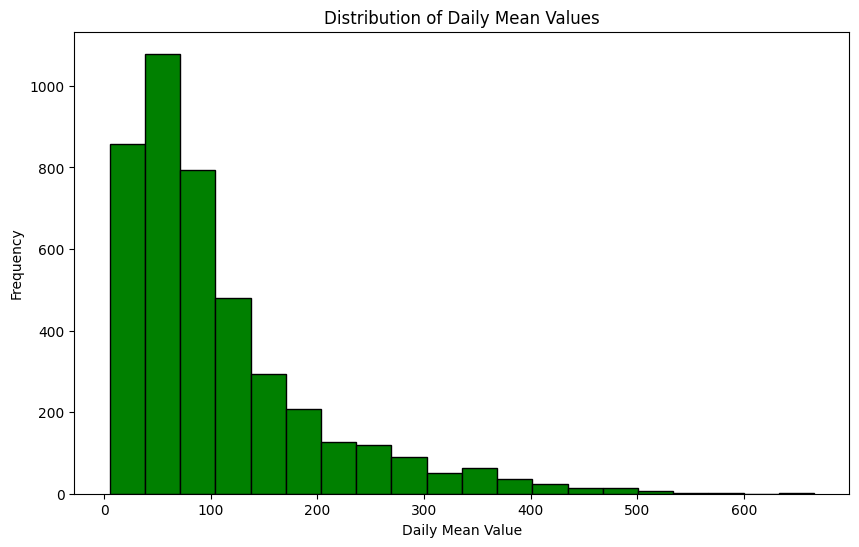

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(dst['DAILY MEAN VALUE'], bins=20, color='g', edgecolor='black')
plt.title('Distribution of Daily Mean Values')
plt.xlabel('Daily Mean Value')
plt.ylabel('Frequency')
plt.show()

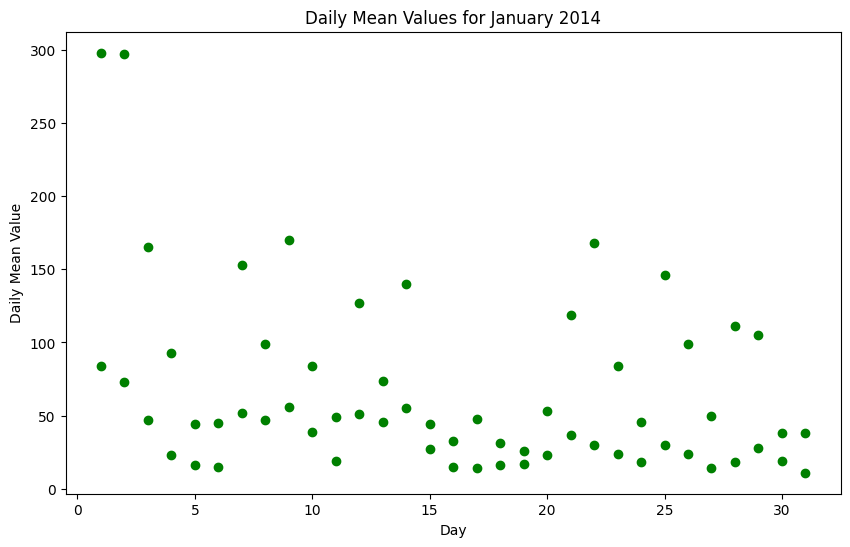

In [62]:
january_2014 = dst[(dst['YY'] == '14') & (dst['MM'] == '01')]

plt.figure(figsize=(10, 6))
plt.scatter(january_2014['DD'].astype(int), january_2014['DAILY MEAN VALUE'], color='g')
plt.title('Daily Mean Values for January 2014')
plt.xlabel('Day')
plt.ylabel('Daily Mean Value')
plt.show()

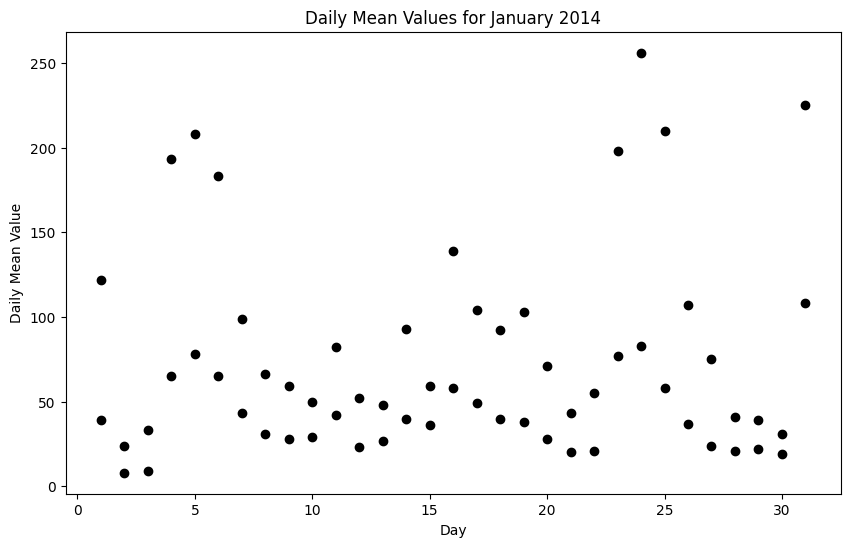

In [64]:
january_2019 = dst[(dst['YY'] == '19') & (dst['MM'] == '01')]

plt.figure(figsize=(10, 6))
plt.scatter(january_2019['DD'].astype(int), january_2019['DAILY MEAN VALUE'], color='black')
plt.title('Daily Mean Values for January 2019')
plt.xlabel('Day')
plt.ylabel('Daily Mean Value')
plt.show()

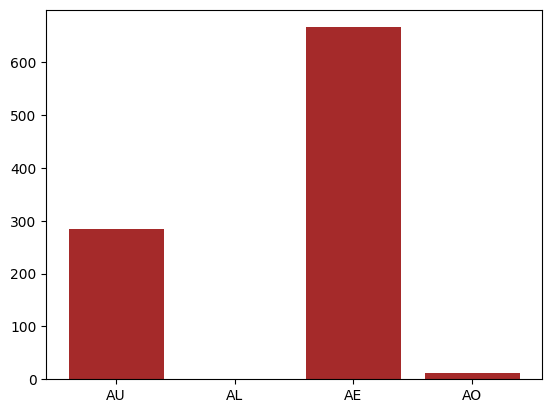

In [74]:
# bar chart for 'Index'
plt.bar(dst['INDEX'], dst['DAILY MEAN VALUE'], color = 'brown')
plt.show()

# KP-AP DATA

In [13]:
headers = ['YYYYMMDD', 'Kp[8]', '', '', '', '','','','', 'Sum','Ap[8]','','','','','','','', 'Ap']
kp = pd.read_csv('./Data/Kp - Ap data.txt', header=None, delim_whitespace=True)
kp.columns = headers
kp.head()
kp.to_csv('./Data/KpAp.csv')